# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "etc","chez","déjà","ans","prés", "alors","jours","celui","celle","celles","devant","cours","rue","prix","maison","grand","grande",
       "heures","très","mois","adresser","place","francs","quelques","chambre","peu","lieu","hier","pays","leurs","louer","temps","matin","hui","toute","jour","aujourd","vient","bonne","cour","elles","rien","vers","toujours","part","bon","cas","froid","ceux","belle","midi","beaucoup","fort"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [48]:
# Choisir une année
#year = 1945
data_path = "../data/camille_vaccination"
DECADE = '1880'

In [49]:
# Lister les fichiers de cette année
data_path = '../data/camille_vaccination'
txt_path = '../data/camille_vaccination'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(DECADE) in f]
txts

txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

txts

['KB_JB555_1880-05-11_01-00003.txt',
 'KB_JB555_1880-08-16_01-00001.txt',
 'KB_JB555_1880-09-25_01-00001.txt',
 'KB_JB555_1881-02-06_01-00002.txt',
 'KB_JB555_1881-02-07_01-00001.txt',
 'KB_JB555_1881-03-09_01-00002.txt',
 'KB_JB555_1881-03-13_01-00002.txt',
 'KB_JB555_1881-04-14_01-00003.txt',
 'KB_JB555_1881-04-16_01-00001.txt',
 'KB_JB555_1882-01-01_01-00002.txt',
 'KB_JB555_1882-02-07_01-00003.txt',
 'KB_JB555_1882-02-22_01-00001.txt',
 'KB_JB555_1882-06-26_01-00001.txt',
 'KB_JB555_1882-07-04_01-00003.txt',
 'KB_JB555_1882-07-28_01-00002.txt',
 'KB_JB555_1882-08-01_01-00001.txt',
 'KB_JB555_1882-09-20_01-00003.txt',
 'KB_JB555_1882-11-17_01-00002.txt',
 'KB_JB555_1883-01-14_01-00003.txt',
 'KB_JB555_1883-03-13_01-00002.txt',
 'KB_JB555_1883-05-01_01-00003.txt',
 'KB_JB555_1883-05-31_01-00003.txt',
 'KB_JB555_1883-06-23_01-00003.txt',
 'KB_JB555_1883-07-03_01-00003.txt',
 'KB_JB555_1883-10-20_01-00001.txt',
 'KB_JB555_1884-02-26_01-00002.txt',
 'KB_JB555_1884-04-07_01-00003.txt',
 

In [50]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r',encoding='utf-8') as f:
        content_list.append(f.read())

In [29]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

217

In [30]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'prouva de la falsification. Elle l\'a si ùicit Senti qu\'elle vient d\'adresser aux membres dc la cour des explications pour réfuter l\'argumentation de M" B<t\'tolaud. « Les livres lie sont pas d\'accord, '

In [51]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp2'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{DECADE}.txt'), 'w',encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [52]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{DECADE}.txt'), 'r',encoding='utf-8') as f:
    before = f.read()

before[:500]

'prouva de la falsification. Elle l\'a si ùicit Senti qu\'elle vient d\'adresser aux membres dc la cour des explications pour réfuter l\'argumentation de M" B<t\'tolaud. « Les livres lie sont pas d\'accord, » me dit-on. Quoi d\'étonnant à cela? L\'un contenait ■» des faits, l\'aulre des impressions. Or, quand je » jetais mes impressions je n\'attachais aucune impor- » tança aux dates ! » Explication bien insuffisante : •pourquoi les mettiez-vous ? Mais il n\'y a pas que la date de fausse; ce qui se trouve s'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [53]:
def clean_text2(folder=None):
    if folder is None:
        input_path = f"{DECADE}.txt"
        output_path = f"{DECADE}_clean.txt"
    else:
        input_path = f"{folder}/{DECADE}.txt"
        output_path = f"{folder}/{DECADE}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [54]:
clean_text2(folder=temp_path)

'Output has been written in ../data/tmp2/1880_clean.txt!'

In [55]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{DECADE}_clean.txt'), 'r',encoding='utf-8') as f:
    after = f.read()

after[:500]

'prouva falsification ùicit senti membres explications réfuter argumentation tolaud livres lie accord quoi étonnant contenait faits aulre impressions quand jetais impressions attachais aucune impor tança dates explication insuffisante pourquoi mettiez date fausse trouve carne daté chaque ligne certains détails contra dition réalité voulu tromper soin concorder dates avocat général constate outre interpolations agenda resté possession santerre empêche scènes indiquées correspondent datées articula'

## Nuage de mots

### Afficher les termes les plus fréquents


In [57]:
frequencies = Counter(after.split())
print(frequencies.most_common(200))

[('liège', 1516), ('bruxelles', 1454), ('saint', 1355), ('paris', 1320), ('gouvernement', 1099), ('demande', 921), ('loi', 886), ('ministre', 886), ('société', 879), ('général', 859), ('soir', 858), ('mai', 758), ('juillet', 755), ('france', 706), ('juin', 700), ('premier', 677), ('question', 669), ('avant', 668), ('belgique', 665), ('journal', 663), ('fer', 658), ('commerce', 650), ('août', 644), ('plusieurs', 637), ('point', 636), ('près', 629), ('bureau', 629), ('partie', 617), ('président', 612), ('première', 607), ('roi', 605), ('londres', 603), ('nombre', 601), ('dernier', 600), ('anvers', 600), ('nouveau', 596), ('conseil', 594), ('moment', 592), ('vendre', 569), ('courant', 566), ('jardin', 555), ('commission', 554), ('vente', 553), ('nouvelle', 553), ('ordre', 550), ('etat', 542), ('octobre', 536), ('suite', 521), ('fois', 520), ('homme', 520), ('affaires', 519), ('septembre', 511), ('séance', 509), ('voix', 509), ('projet', 508), ('année', 504), ('politique', 499), ('marché',

### Créer, stocker et afficher le nuage de mots

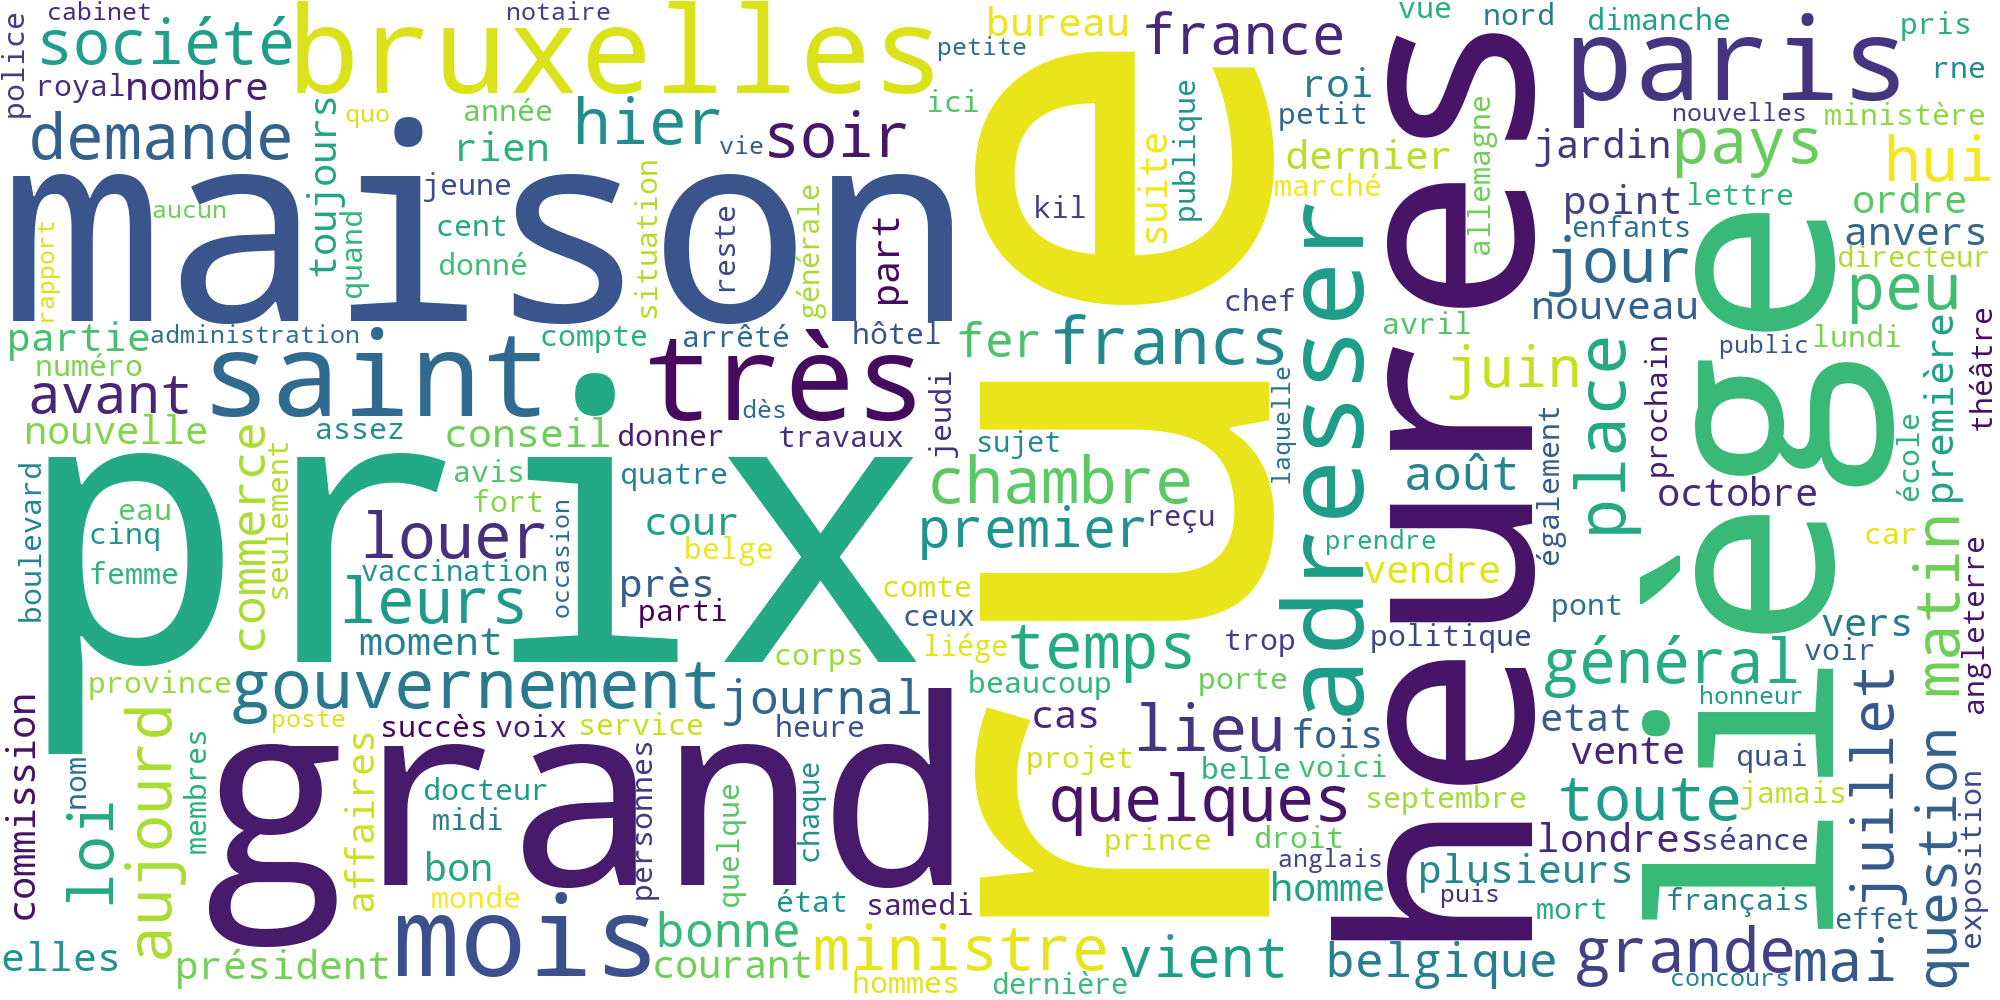

In [37]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{DECADE}.png"))
Image(filename=os.path.join(temp_path, f"{DECADE}.png"))